# Telephone Touch Tones

The aim of this exercise is to present the way telephone tones system works by using signals of different frequency in order to detect which key is pressed. The detection of these frequencies is possible using the Discrete Fourier Transform (DFT) $X[k]$ of the telephone signal $x[n]$. By pressing a key on the phone, a sound is played which is the summation of two sinuses from which the high frequency sinusoid defines the column and the low frequency sinusoid defines the row of the touchpad according to the matrix that follows. 


|         |        | $Ω_{column}$ |        |   |
|---------|--------|------------|--------|---|
| $Ω_{row}$ | 0.9273 | 1.0247     | 1.1328 |   |
| 0.5346  | 1      | 2          | 3      |   |
| 0.5906  | 4      | 5          | 6      |   |
| 0.6535  | 7      | 8          | 9      |   |
| 0.7217  |        | 0          |        |   |
Discrete Frequencies for Telephone Touch Tones for Sampling Frequency equal to 8192Hz.

For example, key 5 is the signal $d_5[n] = sin(0.5906n) + sin(1.0247n)$

In [1]:
# import the necessary modules

import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile
from numpy import hamming # function to create a hamming window
import IPython.display as ipd

%matplotlib inline

(1) Create 10 different tones according to the description. Each tone must have length equal to 1000 samples. Plot the singals in time.

In [2]:
# (1)

# number of samples
N = 1000
# ndarray of samples
n = np.linspace(0, N-1, N)

# array of tones (starting with 0-tone)
tones = np.sin(1.0247*n) + np.sin(0.7217*n)

# samples of signals with column frequencies
col = np.sin([0.9273*n, 1.0247*n, 1.1328*n])
# samples of signals with row frequencies
row = np.sin([0.5346*n, 0.5906*n, 0.6535*n])

# direct sum of signals in columns and rows (each sum is added to the array of tones in ascending order)
for r in row:
    for c in col:
        tones = np.vstack((tones, r+c))

# initializing the figure for tones
plt.figure(figsize=(15,5))

# plotting each tone
for (i, tone) in enumerate(tones):
    plt.plot(tone, label = 'Tone #{}'.format(i))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([0, 100])
plt.show()

(2) Calculate the DFT of signals $d_1[n]$ and $d_8[n]$ and create the plots of $|D_1[k]|$ and $|D_8[k]|$

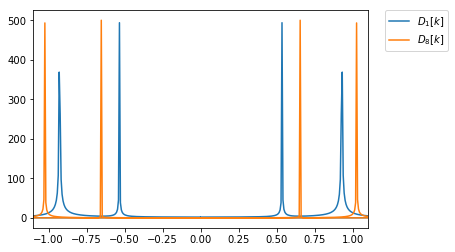

In [3]:
# (2)

# computing DFTs
D_1 = np.fft.fft(tones[1])
D_8 = np.fft.fft(tones[8])

# frequencies of spectra
freqs = np.fft.fftfreq(N)*2*np.pi

# plotting spectra
plt.plot(freqs, abs(D_1), label = '$D_1[k]$')
plt.plot(freqs, abs(D_8), label = '$D_8[k]$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([-1.1, 1.1])
plt.show()

(3) Create a signal with tones by interpreting your date of birth. If you were born on 18 of June 1993 then the signal should be digits 1 8 0 6 1 9 9 3. Each digit should be seperate from the others by inserting 100 zero samples.

In [4]:
# (3)

# Date of birth - 08.02.1994

# separating samples
space = np.zeros(100)
# code of the birthday
DATE = [0,8,0,2,1,9,9,4]

# array for the tones of birthday code (initialized with the first digit)
tone_bd = tones[DATE[0]]

# adding tones for the rest of digits in code DATE, separating them with space samples
for digit in DATE[1:]:
    tone_bd = np.hstack((tone_bd, space))
    tone_bd = np.hstack((tone_bd, tones[digit]))

(4) Using Numpy fft function and suitable time windows (i.) square, and (ii.) Hamming, with length $N=1000$ calculate the Fourier Transform of the windowed signal you create in the previous step. (**Hint:** Create as many windows signals as the number of tones in the original signal).


In [5]:
# (4) windows configuration

# windows for one tone
h_window = hamming(N)
s_window = np.ones(N)

# adding windows fot the rest of tones, separating them with soace samples
for iter in range(len(DATE) - 1):
    h_window = np.hstack((h_window, space))
    h_window = np.hstack((h_window, hamming(N)))
    s_window = np.hstack((s_window, space))
    s_window = np.hstack((s_window, np.ones(N)))

# plotting
plt.plot(s_window, label='Square window')
plt.plot(h_window, label='Hamming window')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

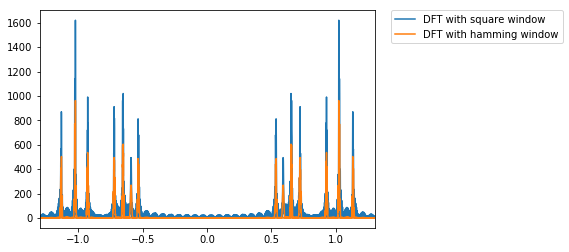

In [6]:
# (4) DFTs

# DFTs of the windowed signal
D_bd_h = np.fft.fft(tone_bd * h_window)
D_bd_s = np.fft.fft(tone_bd * s_window)

# number of samples in tone_bd array
N_bd = len(DATE) * N + (len(DATE) - 1) * len(space)

# frequencies of spectra
freqs = np.fft.fftfreq(N_bd)*2*np.pi

# plotting spectra
plt.plot(freqs, abs(D_bd_s), label = 'DFT with square window')
plt.plot(freqs, abs(D_bd_h), label = 'DFT with hamming window')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([-1.3, 1.3])
plt.show()

(5) Calculate a list of $k$ indices and their respective frequencies for which you believe that they are close to the touch-tone frequencies.

In [7]:
# (5)

# amount of expected frequencies
K = 7
# relation between touch-tone frequency and index
FREQS = [0.5346, 0.5906, 0.6535, 0.7217, 0.9273, 1.0247, 1.1328]

# indices for biggest intensities (only positive frequencies)
# amount of indices is NOT equal to 'K' due to compulsory redundancy
max_idcs = abs(D_bd_h[:N_bd//2]).argsort()[-K*K*K:][::-1]

# frequencies, corresponding to the indices
max_freqs = freqs[max_idcs]

# for each touch-tone frequency
for freq in FREQS:
    # index of the frequency, closest to the touch-tone one
    idx = (np.abs(max_freqs-freq)).argmin()
    print('Frequency {0} with the index {1} is the closest to the touch-tone frequency {2}'.format(max_freqs[idx], idx, freq))

Frequency 0.534431853714 with the index 126 is the closest to the touch-tone frequency 0.5346
Frequency 0.590763859916 with the index 50 is the closest to the touch-tone frequency 0.5906
Frequency 0.653595712988 with the index 33 is the closest to the touch-tone frequency 0.6535
Frequency 0.721483002514 with the index 74 is the closest to the touch-tone frequency 0.7217
Frequency 0.927311486715 with the index 7 is the closest to the touch-tone frequency 0.9273
Frequency 1.02480918976 with the index 63 is the closest to the touch-tone frequency 1.0247
Frequency 1.13313997092 with the index 75 is the closest to the touch-tone frequency 1.1328


(6) Create a function named $ttdecode$ which will take as input the original touch tone signal (as it was described in question (3)) and it will return the respective digits. For example if $signIn$ is the signal of the tones 985 555 555 then the output of the function will be the vector [9,8,5,5,5,5,5,5,5]. Make sure that your function is correct using as input the signal from question (3).

**Hint:** Your function should calculate the energy of each tone of the input signal using the function fft of Numpy. Thereafter the function should locate the functions with the highest energy and map them to the original frequencies of the table in the description in order to track the respective digit. It is reminded that the energy $E[k]$ of the signal near the frequency with index k is equal to $E_k=|X[k]|^2$.

In [8]:
# (6)

def ttdecode(signal):
    
    """
    Decodes the signal, created with the touch-rone frequencies by algorithm, described in (3)
    :param signal: input signal with arbitrary number of encoded digits
    :return: list of decoded digits
    """
    
    # size of one tone (hardcoded for 1000)
    N = 1000
    
    # size of input signal
    size = signal.shape[0]
    
    # size of space between tones
    space_size = N/10

    # amount of tones in signal
    t_nums = (size + space_size) / (N + space_size)
    
    # space between tones
    space = np.zeros(space_size)
    
    # array of hamming windows for all tones
    windows = np.zeros((t_nums, size))
    for i in range(t_nums):
        windows[i, i * (space_size + N) : i * (space_size + N) + N] = hamming(N)
    
    # amount of expected frequencies
    K = 2
    # relation between touch-tone frequency and index
    FREQS = [0.5346, 0.5906, 0.6535, 0.7217, 0.9273, 1.0247, 1.1328]
    # amount of touch-tone frequencies
    F = len(FREQS)

    # matrix of tones for numbers, non-existing combinations result in '-1'
    TT_MATRIX = -np.ones((F,F))
    TT_MATRIX[:3, -3:] = np.arange(1,10).reshape((3,3))
    TT_MATRIX[-3:, :3] = np.transpose(np.arange(1,10).reshape((3,3)))
    TT_MATRIX[3, 5] = TT_MATRIX[5, 3] = 0
    TT_MATRIX = TT_MATRIX.astype(int)

    # array of frequencies
    freqs = np.fft.fftfreq(size)*2*np.pi
    
    # output array (to be filled)
    output = []
    
    # cycle for different tones
    for w in windows:

        # DFT of windowed signal
        D_bd_h = np.fft.fft(signal * w)

        # indices for biggest intensities (only positive frequencies)
        # amount of indices is NOT equal to 'K' due to compulsory redundancy
        max_idcs = abs(D_bd_h[:N_bd//2]).argsort()[-K*K*K:][::-1]
        # frequencies, corresponding to the indices
        max_freqs =  freqs[max_idcs]
        
        # index array of chosen touch-tone frequencies (to be filled)
        TT_FREQS = []

        # cycle to check all TTFs
        for (i, freq) in enumerate(FREQS):
            # index of a frequency that seems closest to a TTF
            idx = (np.abs(max_freqs - freq)).argmin()
            
            # if this frequency is in the epsilon neighborhood (EPS = 0.01) of TTF,
            # that TTF is chosen to be one of the indices
            if np.abs(max_freqs[idx] - freq) < 0.01:
                TT_FREQS.append(i)
            
            # if amount of indices is already '2', break cycle, even there are unchecked TTFs left
            if (len(TT_FREQS) == 2):
                break
        
        # append element of TTF matrix with acquired indices
        output.append(TT_MATRIX[TT_FREQS[0], TT_FREQS[1]])

    return output

print('Let\'s decode the birthday signal:')
print(ttdecode(tone_bd))

Let's decode the birthday signal:
[0, 8, 0, 2, 1, 9, 9, 4]


(7) Decode the two provided wav file with names 'easysignal.wav' and 'hardsignal.wav'. Load the wav files, decode them and print your solution.  

Plot and produce sound for every relevant step. Dont forget to comment your code and describe your train of thought.

In [9]:
# (7) 'easysignal.wav'

# reading signal
freq, arr = wavfile.read('easysignal.wav')

# decoding signal
print("Easy signal decode: {}".format(ttdecode(arr)))
ipd.Audio(arr, rate=freq)

Easy signal decode: [0, 0, 9, 1, 2, 5, 5, 7]


In [10]:
# (7) 'hardsignal.wav'

# reading signal
freq, arr = wavfile.read('hardsignal.wav')

# decoding signal
print("Hard signal decode: {}".format(ttdecode(arr)))
ipd.Audio(arr, rate=freq)

Hard signal decode: [0, 0, 9, 1, 2, 5, 5, 7, 8, 9, 9, 0, 4, 3, 5, 2]


In [11]:
# (7) 'hardsignal_noisy.wav'

# reading signal
freq, arr = wavfile.read('hardsignal_noisy.wav')

# decoding signal
print("Hard signal decode: {}".format(ttdecode(arr)))
ipd.Audio(arr, rate=freq)

Hard signal decode: [0, 0, 9, 1, 2, 5, 5, 7, 8, 9, 9, 0, 4, 3, 5, 2]


In [12]:
# Code example on how to listen audio from jupyter notebook
t = np.arange(1,20000)
example_sound = np.sin(0.5*t) # create a sound with a simple sinusoid
ipd.Audio(example_sound, rate=8192) # load a NumPy array